<a href="https://colab.research.google.com/github/josejose2019/cerebroVascular/blob/main/AccidenteCerebroVascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 2 (Opcion 2 Stroke)

<img src="https://www.neuraldojo.org/media/bg_stroke.jpeg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>


### **Nombre Alumno:**

**Contexto**

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular (**stroke**) es la segunda causa de muerte en todo el mundo, responsable de aproximadamente el 11% del total de muertes.
Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.

## Información del dataset

1. id: identificador único
2. gender: "Masculino", "Femenino" u "Otro"
3. age: edad del paciente
4. hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión
5. heart_disease: 0 si el paciente no tiene ninguna enfermedad del corazón, 1 si el paciente tiene una enfermedad del corazón
6. ever_married: "No" o "Sí"
7. work_type: "niños", "Govt_jov", "Never_worked", "Private" o "Self-employment"
8. Residence_type: "Rural" o "Urban"
9. avg_glucose_level: nivel promedio de glucosa en sangre
10. IMC: índice de masa corporal
11. smoking_status: "anteriormente fumó", "nunca fumó", "fuma" o "Desconocido"*
12. stroke: 1 si el paciente tuvo un stroke o 0 en caso contrario

*Nota: "Desconocido" en smoking_status significa que la información no está disponible para este paciente*

##Objetivo de la practica

- Parte 1. En un Notebook construya un modelo para predecir la probabilidad de que un paciente sufra un accidente cerebrovascular.
- Parte 2. Publique y comparta su Notebook en [Github.com](https://www.github.com)
- Parte 3. En base al trabajo desarrollado y los hallazasgos redacte, publique y comparta un articulo en [medium.com](https://www.medium.com)

##Criterios de Evaluación

Parte 1.

- Seguir todos los pasos de un proceso ML:
    - Identificación del Problema
    - Importación de datos
    - EDA
    - Modelado (probar al menos tres algoritmos)
    - Evaluación (al menos dos métricas)
    - Hypertunning con Gridsearch
    - Selección del Modelo
    - Resultados y Conclusiones

- Todo el código del proyecto esté contenido en un cuaderno o script de Jupyter o Google Colab. 
- Demuestre una ejecución y salida exitosas del código, sin errores.
- Escriba código que esté bien documentado y use funciones y clases según sea necesario.

Parte 2.

El repositorio en Github debe conteener:
- El cuaderno *.ipynb
- README.md, que explique el problema, una descripcion del dataset, requerimientos y librerias para la correcta ejecución del codigo, Resultados y conclusiones
- Licencia del codigo

Parte 3.

El articulo en medium debera contener las siguientes secciones:

- Introduccion
- Problema
- Analisis Exploratorio explicando aspectos relevantes de lo encontrado
- Modelado ML
- Evaluación y Hipertunning
- Resultados y Conclusiones
- Incluir referencia on enlace al codigo disponible en su cuenta github.

##Dataset

Puede descargar el dataset aqui: https://neuraldojo.org/media/stroke/archive.zip

##Método de Entrega del trabajo:

Enviar e mi correo: necrus.aikon@gmail.com, Asunto: Practica 2 (Stroke) los siguiente:
- Enlace o archivo adjunto del codigo en colab
- Enlace github
- Enlace medium

  




##1.- Importacion de librerias y datos

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#Importamos el Dataset
!wget https://neuraldojo.org/media/stroke/archive.zip
!unzip archive.zip

--2022-06-13 03:03:50--  https://neuraldojo.org/media/stroke/archive.zip
Resolving neuraldojo.org (neuraldojo.org)... 143.95.32.198
Connecting to neuraldojo.org (neuraldojo.org)|143.95.32.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69007 (67K) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]  67.39K   288KB/s    in 0.2s    

2022-06-13 03:03:51 (288 KB/s) - ‘archive.zip’ saved [69007/69007]

Archive:  archive.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [3]:
#Cargamos los datos en un dataframe
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

##2.- Analisis de datos (EDA)

###2.1 Inspeccion y manipulacion de los datos

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
df['stroke'].unique()

array([1, 0])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [9]:
df_sc = df.drop('id', axis = 1)

In [10]:
df_sc.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df_sc = df_sc.drop(['gender', 'age', 'ever_married', 'work_type', 'Residence_type'], axis = 1)
df_sc.head()

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,228.69,36.6,formerly smoked,1
1,0,0,202.21,NaN,never smoked,1
2,0,1,105.92,32.5,never smoked,1
3,0,0,171.23,34.4,smokes,1
4,1,0,174.12,24.0,never smoked,1


###2.2 Verificacion de valores nulos

In [12]:
df_sc.isnull().sum()

hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df_sc

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,228.69,36.6,formerly smoked,1
1,0,0,202.21,NaN,never smoked,1
2,0,1,105.92,32.5,never smoked,1
3,0,0,171.23,34.4,smokes,1
4,1,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...
5105,1,0,83.75,NaN,never smoked,0
5106,0,0,125.20,40.0,never smoked,0
5107,0,0,82.99,30.6,never smoked,0
5108,0,0,166.29,25.6,formerly smoked,0


In [14]:
df_sc['bmi'] = df_sc['bmi'].fillna(0)
df_sc

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,228.69,36.6,formerly smoked,1
1,0,0,202.21,0.0,never smoked,1
2,0,1,105.92,32.5,never smoked,1
3,0,0,171.23,34.4,smokes,1
4,1,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...
5105,1,0,83.75,0.0,never smoked,0
5106,0,0,125.20,40.0,never smoked,0
5107,0,0,82.99,30.6,never smoked,0
5108,0,0,166.29,25.6,formerly smoked,0


In [15]:
df_sc.isnull().sum()

hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

###2.3 Valores categóricos a cuantitativos

In [16]:
df_sc['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [17]:
dummy_smok = pd.get_dummies(df_sc['smoking_status'], prefix = 'smk')

In [18]:
dummy_smok.head()

,smk_Unknown,smk_formerly smoked,smk_never smoked,smk_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [19]:
df_sc.shape

(5110, 6)

In [20]:
df_cc = df_sc.drop(['smoking_status'], axis = 1)
df_cc.shape

(5110, 5)

In [21]:
df_cc.head()

,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,228.69,36.6,1
1,0,0,202.21,0.0,1
2,0,1,105.92,32.5,1
3,0,0,171.23,34.4,1
4,1,0,174.12,24.0,1


In [22]:
df_ccc = pd.concat([dummy_smok,df_cc], axis = 1)

In [23]:
df_ccc.head()

,smk_Unknown,smk_formerly smoked,smk_never smoked,smk_smokes,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,0,1,228.69,36.6,1
1,0,0,1,0,0,0,202.21,0.0,1
2,0,0,1,0,0,1,105.92,32.5,1
3,0,0,0,1,0,0,171.23,34.4,1
4,0,0,1,0,1,0,174.12,24.0,1


###2.4 Distribucion y correlacion de datos

In [24]:
df_ccc['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [25]:
dist = df_ccc['stroke'].value_counts()

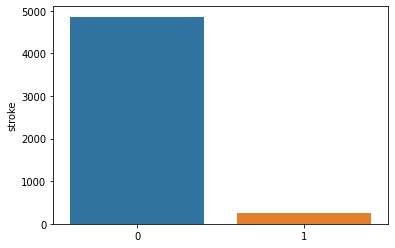

In [26]:
sns.barplot(x = dist.index, y = dist)

In [27]:
df_ccc.corr()

,smk_Unknown,smk_formerly smoked,smk_never smoked,smk_smokes,hypertension,heart_disease,avg_glucose_level,bmi,stroke
smk_Unknown,1.000000,-0.301156,-0.504546,-0.281177,-0.141501,-0.066731,-0.095131,-0.214379,-0.055892
smk_formerly smoked,-0.301156,1.000000,-0.350934,-0.195571,0.058853,0.066804,0.068111,0.063538,0.064556
smk_never smoked,-0.504546,-0.350934,1.000000,-0.327653,0.065063,-0.021856,0.023885,0.128106,-0.004129
smk_smokes,-0.281177,-0.195571,-0.327653,1.000000,0.031240,0.044049,0.017646,0.034702,0.008939
hypertension,-0.141501,0.058853,0.065063,0.031240,1.000000,0.108306,0.174474,0.074557,0.127904
heart_disease,-0.066731,0.066804,-0.021856,0.044049,0.108306,1.000000,0.161857,-0.026709,0.134914
avg_glucose_level,-0.095131,0.068111,0.023885,0.017646,0.174474,0.161857,1.000000,0.082116,0.131945
bmi,-0.214379,0.063538,0.128106,0.034702,0.074557,-0.026709,0.082116,1.000000,-0.051791
stroke,-0.055892,0.064556,-0.004129,0.008939,0.127904,0.134914,0.131945,-0.051791,1.000000


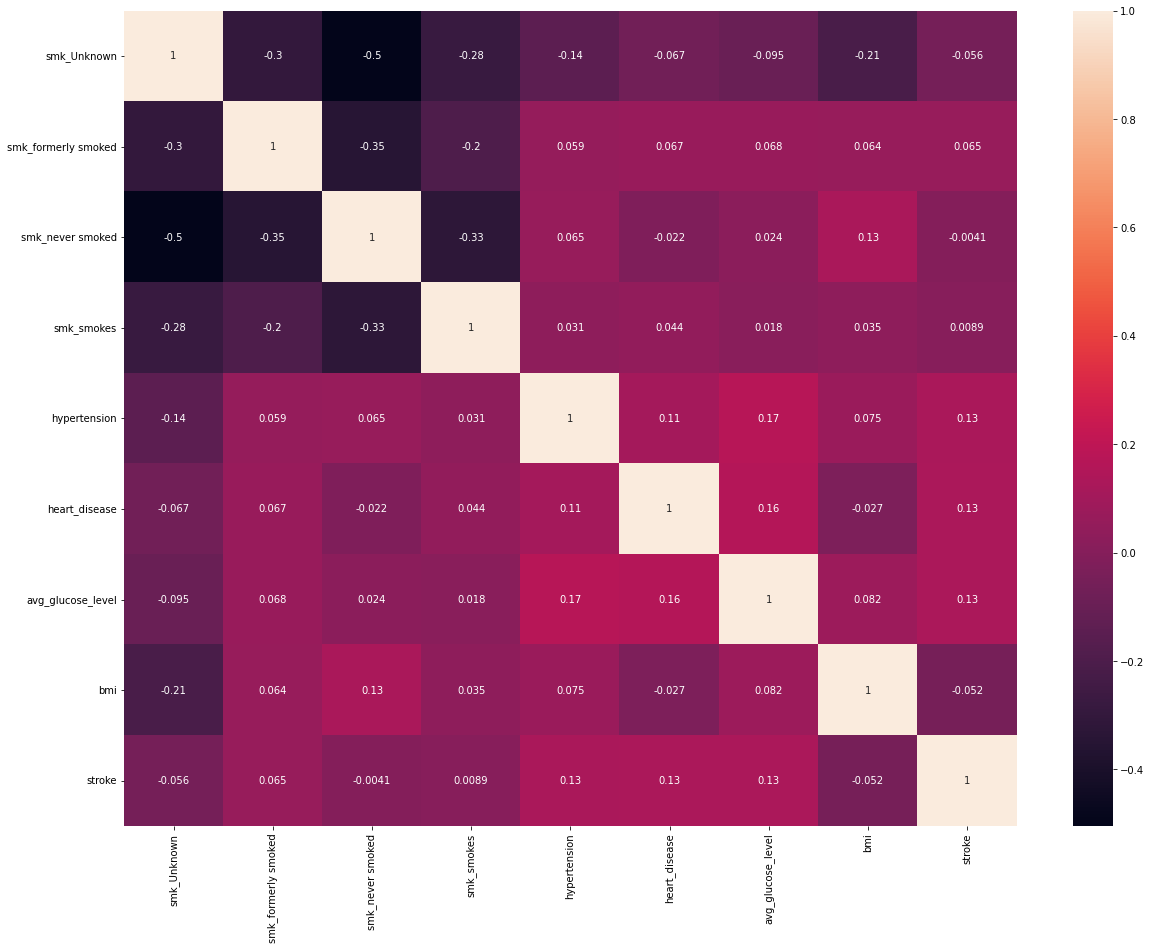

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(df_ccc.corr(), annot = True)

In [29]:
high_corr = df_ccc.corr().abs()
high_corr.unstack().sort_values(ascending = False)[10:15]

smk_never smoked     smk_Unknown            0.504546
smk_formerly smoked  smk_never smoked       0.350934
smk_never smoked     smk_formerly smoked    0.350934
smk_smokes           smk_never smoked       0.327653
smk_never smoked     smk_smokes             0.327653
dtype: float64

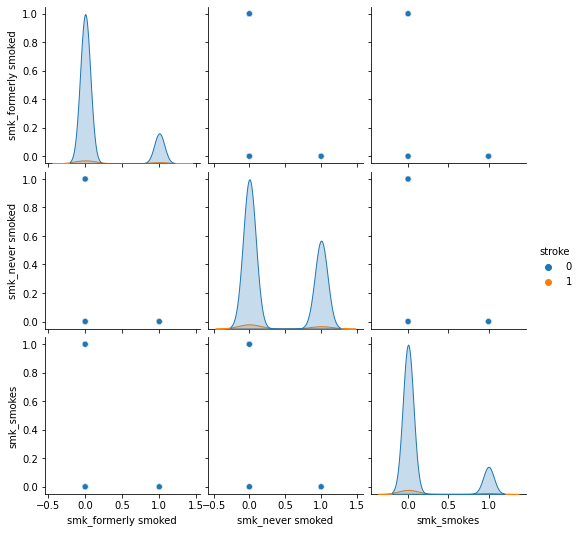

In [30]:
sns.pairplot(data = df_ccc[['smk_formerly smoked','smk_never smoked','smk_smokes','stroke']], hue = 'stroke')

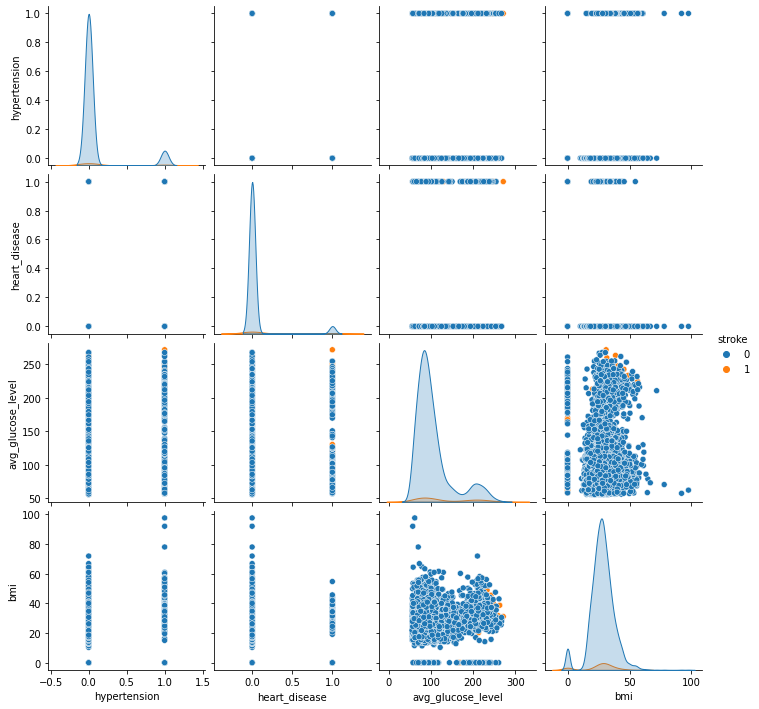

In [31]:
sns.pairplot(data = df_ccc[['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']], hue = 'stroke')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


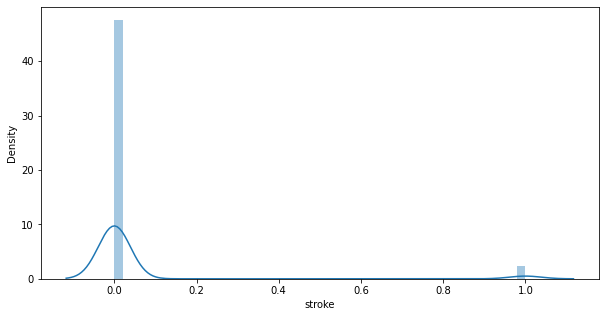

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(df_ccc['stroke'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


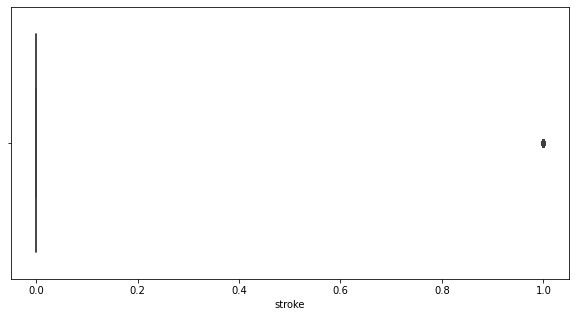

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(df_ccc['stroke'])

In [34]:
print("Mean:", df_ccc['stroke'].mean())
print("Median:", df_ccc['stroke'].median())

Mean: 0.0487279843444227
Median: 0.0


###2.5 Division de los datos en Train, Validación y Test

In [35]:
df_ccc.shape

(5110, 9)

In [36]:
test = df_ccc.iloc[-110:]
df_ccc_ = df_ccc.iloc[0:5000,:]

In [37]:
test

,smk_Unknown,smk_formerly smoked,smk_never smoked,smk_smokes,hypertension,heart_disease,avg_glucose_level,bmi,stroke
5000,0,0,1,0,0,0,124.66,27.3,0
5001,0,0,1,0,0,0,212.87,34.8,0
5002,0,1,0,0,0,0,96.75,28.4,0
5003,1,0,0,0,0,0,63.28,40.2,0
5004,1,0,0,0,0,0,82.64,31.1,0
...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,1,0,83.75,0.0,0
5106,0,0,1,0,0,0,125.20,40.0,0
5107,0,0,1,0,0,0,82.99,30.6,0
5108,0,1,0,0,0,0,166.29,25.6,0


In [38]:
df_ccc_

,smk_Unknown,smk_formerly smoked,smk_never smoked,smk_smokes,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,0,1,228.69,36.6,1
1,0,0,1,0,0,0,202.21,0.0,1
2,0,0,1,0,0,1,105.92,32.5,1
3,0,0,0,1,0,0,171.23,34.4,1
4,0,0,1,0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...
4995,1,0,0,0,0,0,182.52,30.1,0
4996,0,0,1,0,0,0,93.97,23.6,0
4997,1,0,0,0,0,0,104.03,18.4,0
4998,0,0,1,0,0,0,67.99,32.1,0


In [39]:
x = df_ccc_.iloc[:,0:8]

In [40]:
x.head()

,smk_Unknown,smk_formerly smoked,smk_never smoked,smk_smokes,hypertension,heart_disease,avg_glucose_level,bmi
0,0,1,0,0,0,1,228.69,36.6
1,0,0,1,0,0,0,202.21,0.0
2,0,0,1,0,0,1,105.92,32.5
3,0,0,0,1,0,0,171.23,34.4
4,0,0,1,0,1,0,174.12,24.0


In [41]:
x

,smk_Unknown,smk_formerly smoked,smk_never smoked,smk_smokes,hypertension,heart_disease,avg_glucose_level,bmi
0,0,1,0,0,0,1,228.69,36.6
1,0,0,1,0,0,0,202.21,0.0
2,0,0,1,0,0,1,105.92,32.5
3,0,0,0,1,0,0,171.23,34.4
4,0,0,1,0,1,0,174.12,24.0
...,...,...,...,...,...,...,...,...
4995,1,0,0,0,0,0,182.52,30.1
4996,0,0,1,0,0,0,93.97,23.6
4997,1,0,0,0,0,0,104.03,18.4
4998,0,0,1,0,0,0,67.99,32.1


In [42]:
y = df_ccc_['stroke']

In [43]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [ ]:
#y = pd.get_dummies(y)[1]
#y

0       1
1       1
2       1
3       1
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: 1, Length: 5000, dtype: uint8

In [44]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state = 0, test_size = 0.3)

##3.- Preparar el modelo

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)

KNeighborsClassifier()

##4.- Evaluar el modelo

In [46]:
print("Score Train", knn.score(x_train, y_train))
print("Score Validation", knn.score(x_valid, y_valid))
#print("Score Test", knn.score(test.iloc[:,0:8], pd.get_dummies(test['stroke'])[1]))
print("Score Test", knn.score(test.iloc[:,0:8], pd.get_dummies(test['stroke'])))

Score Train 0.95
Score Validation 0.954
Score Test 0.0
